# Funcion de Onda con Valores de Energia manuales solucion numerica Numerov
#  Solución  Numerica de problemas  1D

En general  la  ecuación de  Schrödinger  independiente del  tiempo en  1D es

$-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)+V(x)\psi(x)=E\psi(x)$

reescribimos la   ecuación como :
$\frac{d^2}{dx^2}\psi(x)=\frac{2m}{\hbar^2}(V(x)-E)\psi(x)$.

La forma  general  de esta  ecuación es 

$\frac{d^2}{dx^2}\psi(x)=f(x)\psi(x)$

donde

$f(x)=\frac{2m}{\hbar^2}(V(x)-E)$

## El  metodo de  Numerov

Es un metodo  numerico  para  resolver  ecuaciones de la   forma $\frac{d^2}{dx^2}\psi(x)=f(x)\psi(x)$

\begin{equation}
 \psi(x+h) =\psi(x)+h\dot{\psi}(x)+\frac{h^2}{2!}\ddot{\psi}(x)+\frac{h^3}{3!}\dddot{\psi}(x)+\frac{h^4}{4!}\ddddot{\psi}+\frac{h^5}{5!}\dddot{\ddot{\psi}}(x)+O(h^6)
\end{equation}

\begin{equation}
 \psi(x-h) =\psi(x)-h\dot{\psi}(x)+\frac{h^2}{2!}\ddot{\psi}(x)-\frac{h^3}{3!}\dddot{\psi}(x)+\frac{h^4}{4!}\ddddot{\psi}(x)-\frac{h^5}{5!}\dddot{\ddot{\psi}}(x)+O(h^6)
\end{equation}

Al  sumar estas  dos  ecuaciones  tenemos:

\begin{equation}
 \psi(x-h)+\psi(x+h)-2\psi(x)=h^2f(x)\psi(x)+\frac{h^4}{12}\ddddot{\psi}(x)
\end{equation}

ahora  podemos   escribir la  cuarta  derivada  como :

\begin{equation}
  \ddddot{\psi}(x) =\frac{f(x+h)\psi(x+h)+f(x-h)\psi(x-h)-2f(x)\psi(x)}{h^2}
\end{equation}

Finalmente   encontramos  que 

\begin{equation}
 \psi(x+h) = \frac{2\psi(x)[1+\frac{5}{12}h^2f(x)]-\psi(x-h)[1+\frac{h^2}{12}f(x-h)]}{1+\frac{h^2}{12}f(x+h)}
\end{equation}

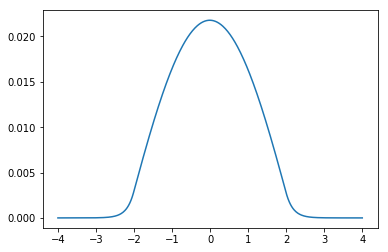

-4.170312732383483e-07


In [13]:
import numpy as np
import matplotlib.pylab as plt
from math import fabs

def fwell(x,prm):
    l = prm[0]
    v0 = prm[1]
    E = prm[2]
    
    if fabs(x)<=l/2.:
        return -E
    else:
        return v0-E
        


def numerov(xi,xf,n,f,phi0,prm):

    
    h = (xf-xi)/(1.0*n)
    x = np.arange(xi,xf+h,h)
    phi = np.zeros([np.shape(x)[0]])
    phi[0]=phi0[0]
    phi[1]=phi0[1]
    
    for i in range(2,np.shape(x)[0]):
       
        
        aux1 = 2.*phi[i-1]*(1.+5.*h**2*f(x[i-1],prm)/12.)
        aux2 = phi[i-2]*(1-h**2*f(x[i-2],prm)/12.)
        aux3 = 1-h**2*f(x[i],prm)/12. # x+h = x[i]
        phi[i] =(aux1-aux2)/aux3
        
        
        
        
    return phi,x



        

L = 4.
V0 = 30.
#E = 0.517660570145
E = 0.5176605660882259
#E = 0.5
phi,x= numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,E])
plt.plot(x,phi)
plt.show()
print(phi[-1])

# Encontrando las energias de convergencia mediante bisección 

In [2]:

def bis(a,b,tol):
    # intervalos  0.01
    Energys = []
    x = np.linspace(a,b,10)
   
    
   
    for i in range(len(x)-1):
        a0 = x[i]
        b0 = x[i+1]
        fa,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,a0])
        fb,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,b0])
    
        if fa[-1]*fb[-1]<0.:
            print('si')
            c=(a0+b0)/2.
            fc,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,c])
            while abs(fc[-1]) > tol:

                fa,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,a0])
                fc,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,c])

                if fa[-1]*fc[-1]<0:
                    b0 = c
                else:
                    a0 = c
                c = (a0+b0)/2.
            Energys +=[c]
    
    return Energys 
a = 0
b = 1
tol = 10**-6

        
print(bis(a,b,tol))

si
[0.5176605660882259]


# Módulo de la función de Onda - Integración númerica (Trapesio compuesto)


In [21]:
def simpson13(phi,x):
    #calculamos h
    h = x[1]-x[0]
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = 0.0
    #hacemos un ciclo para ir sumando las areas
    for i in range(1,len(x) ):
        #calculamos la x
        #x = a - h + (2 * h * i)
        x = [i]
        # si es par se multiplica por 4
        if(i % 2 == 0):
            suma = suma + 2 *phi[i]
        #en caso contrario se multiplica por 2
        else:
            suma = suma + 4 * phi[i]
    #sumamos los el primer elemento y el ultimo
    suma = suma + phi[0] + phi[-1]
    #Multiplicamos por h/3
    rest = suma * (h / 3.)
    #Retornamos el resultado
    return (rest)
phi,x = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,0.5176605660882259])
phi2 = abs(np.array(phi))**2
res = simpson13(phi2,x)

# Gráfica del módulo de la funcion de onda 


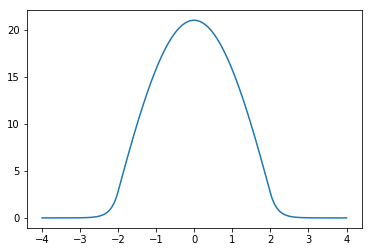

In [26]:
phi,x = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,0.5176605660882259])
phi_mod = np.array(phi)/res
plt.plot(x,phi_mod)